In [1]:
# Description: Plot Figure 9 (eddy phase speeds in flat versus 2D monochromatic rough bottom experiments).
# Author:      André Palóczy
# E-mail:      paloczy@gmail.com
# Date:        March/2022

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cmocean.cm import balance

In [3]:
def get_label(F1):
    LjonLd = np.sqrt(F1)/5
    if LjonLd==1:
        l = r"$L_j = L_{d1}$"
    elif LjonLd==int(LjonLd):
        l = r"$L_j = %dL_{d1}$"%LjonLd
    else:
        l = r"$L_j = %.1fL_{d1}$"%LjonLd

    return l

In [4]:
plt.close("all")

cmap = balance
L, N = 2, 256
dx = L/N
dy = dx
x = np.linspace(0, L, num=N)

ttyp = "cosi"
httall = 5
F1 = 75
all_F1s = [25, 75, 400]
all_hts = range(1, 11)

head = "../../simulations/"

In [5]:
fflat = "lin_N%d_ht0_F1%d_cosi10.npz"%(N, F1)
ftall = "lin_N%d_ht%d_F1%d_%s10.npz"%(N, httall, F1, ttyp)

d = np.load(head+fflat)
t_flat, psi1_flat, psi2_flat = d["thovm"], d["p1hovm"], d["p2hovm"]
d = np.load(head+ftall)
t_tall, psi1_tall, psi2_tall = d["thovm"], d["p1hovm"], d["p2hovm"]
t_flat -= t_flat[0]
t_tall -= t_tall[0]
mint = np.minimum(t_tall[-1], t_flat[-1])

# Calculate phase speeds.
ddt_psi1_flat, ddx_psi1_flat = np.gradient(psi1_flat, t_flat, x)
ddt_psi2_flat, ddx_psi2_flat = np.gradient(psi2_flat, t_flat, x)
ddt_psi1_tall, ddx_psi1_tall = np.gradient(psi1_tall, t_tall, x)
ddt_psi2_tall, ddx_psi2_tall = np.gradient(psi2_tall, t_tall, x)
cr_psi1_flat = ddt_psi1_flat/ddx_psi1_flat
cr_psi2_flat = ddt_psi2_flat/ddx_psi2_flat
cr_psi1_tall = ddt_psi1_tall/ddx_psi1_tall
cr_psi2_tall = ddt_psi2_tall/ddx_psi2_tall
cr_psi1_flat = np.median(np.abs(cr_psi1_flat))
cr_psi2_flat = np.median(np.abs(cr_psi2_flat))
cr_psi1_tall = np.median(np.abs(cr_psi1_tall))
cr_psi2_tall = np.median(np.abs(cr_psi2_tall))

# Normalize by amplitude at each time step to see the phase propagation more clearly.
psi1_flat = psi1_flat/np.abs(psi1_flat).max(axis=1)[:, np.newaxis]
psi2_flat = psi2_flat/np.abs(psi2_flat).max(axis=1)[:, np.newaxis]
psi1_tall = psi1_tall/np.abs(psi1_tall).max(axis=1)[:, np.newaxis]
psi2_tall = psi2_tall/np.abs(psi2_tall).max(axis=1)[:, np.newaxis]

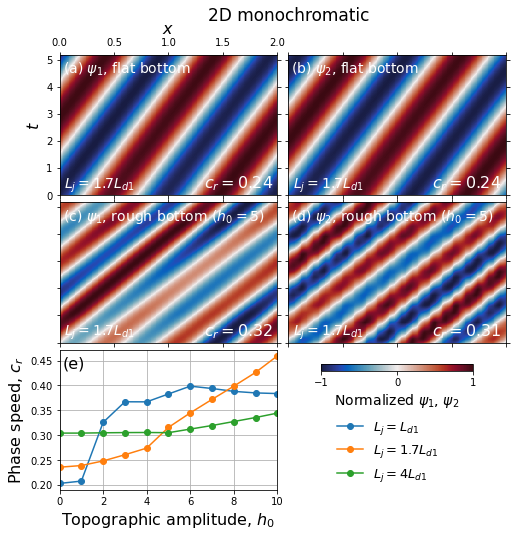

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
ax1, ax4 = ax[0]
ax2, ax5 = ax[1]
ax3, ax6 = ax[2]
ax1.xaxis.tick_top(); ax1.xaxis.set_label_position("top")
ax4.xaxis.tick_top(); ax4.xaxis.set_label_position("top")
fig.subplots_adjust(hspace=0.05, wspace=0.05)

ax2.tick_params(labelbottom=False, labelleft=False)
ax4.tick_params(labeltop=False, labelleft=False)
ax5.tick_params(labelbottom=False, labelleft=False)

axsaux = (ax1, ax2, ax4, ax5)
for axaux in axsaux:
    axaux.set_xlim(0, L)
    axaux.set_ylim(0, mint)
    axaux.tick_params(bottom=True, top=True, left=True, right=True)

cs1 = ax1.pcolormesh(x, t_flat, psi1_flat, cmap=cmap)
cs2 = ax2.pcolormesh(x, t_tall, psi1_tall, cmap=cmap)
cs4 = ax4.pcolormesh(x, t_flat, psi2_flat, cmap=cmap)
cs5 = ax5.pcolormesh(x, t_tall, psi2_tall, cmap=cmap)

xt, yt = 0.015, 0.87
xt2, yt2 = 0.98, 0.05
xt3, yt3 = 0.02, 0.05
kwtxt = dict(color="w", fontsize=14, fontweight="normal")
kwtxt2 = dict(color="w", fontsize=16, fontweight="normal", ha="right")
kwtxt3 = dict(color="w", fontsize=14, fontweight="normal")
ax1.text(xt, yt, r"(a) $\psi_1$, flat bottom", transform=ax1.transAxes, **kwtxt)
ax1.text(xt2, yt2, r"$c_r = %.2f$"%cr_psi1_flat, transform=ax1.transAxes, **kwtxt2)
ax2.text(xt, yt, r"(c) $\psi_1$, rough bottom ($h_0 = %d$)"%httall, transform=ax2.transAxes, **kwtxt)
ax2.text(xt2, yt2, r"$c_r = %.2f$"%cr_psi1_tall, transform=ax2.transAxes, **kwtxt2)
ax4.text(xt, yt, r"(b) $\psi_2$, flat bottom", transform=ax4.transAxes, **kwtxt)
ax4.text(xt2, yt2, r"$c_r = %.2f$"%cr_psi2_flat, transform=ax4.transAxes, **kwtxt2)
ax5.text(xt, yt, r"(d) $\psi_2$, rough bottom ($h_0 = %d$)"%httall, transform=ax5.transAxes, **kwtxt)
ax5.text(xt2, yt2, r"$c_r = %.2f$"%cr_psi2_tall, transform=ax5.transAxes, **kwtxt2)

ax1.text(xt3, yt3, get_label(F1), transform=ax1.transAxes, **kwtxt3)
ax2.text(xt3, yt3, get_label(F1), transform=ax2.transAxes, **kwtxt3)
ax4.text(xt3, yt3, get_label(F1), transform=ax4.transAxes, **kwtxt3)
ax5.text(xt3, yt3, get_label(F1), transform=ax5.transAxes, **kwtxt3)

ax1.set_xlabel(r"$x$", fontsize=16)
ax1.set_ylabel(r"$t$", fontsize=16)

all_htsp = np.append(0, np.array(all_hts))
cr1, cr2 = [], []
for F1 in all_F1s:
    for ht in all_hts:
        f = "../../data/cr_F1%d_ht%d_%s_unfiltered.npz"%(F1, ht, ttyp)
        d = np.load(f)
        if ht==1:
            cr1.append(d["cr1_flat"])
            cr2.append(d["cr2_flat"])
        cr1.append(d["cr1_tall"])
        cr2.append(d["cr2_tall"])

    p = ax3.plot(all_htsp, np.array(cr1), marker="o", label=get_label(F1))
    cr1, cr2 = [], []

loc = (1.25, 0.01)
ax3.grid()
ax3.legend(frameon=False, loc=loc, fontsize=13)
ax3.set_xlim(all_htsp[0], all_htsp[-1])
ax3.text(xt, yt, r"(e)", transform=ax3.transAxes, fontsize=16, fontweight="normal")
ax3.set_xlabel(r"Topographic amplitude, $h_0$", fontsize=16)
ax3.set_ylabel(r"Phase speed, $c_r$", fontsize=16)
ttl = "2D monochromatic"

ax4.set_title(ttl, fontsize=17, x=0, y=1.2)

cblabel = r"Normalized $\psi_1$, $\psi_2$"
ax6.set_visible(False)
cbw = 0.7
caxx, caxy0 = 0.15, -0.2
cb = fig.colorbar(mappable=cs2, cax=ax5.inset_axes([caxx, caxy0, cbw, 0.05]), orientation="horizontal")
cb.ax.xaxis.set_ticks_position("bottom"); cb.ax.xaxis.set_label_position("bottom")
cb.set_ticks([-1, 0, 1])
cb.set_label(cblabel, fontsize=14, fontweight="normal")

fig.savefig("fig09.png", bbox_inches="tight")

plt.show()